In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# paper of GAN by Ian Goodfellow
# https://github.com/GodLovesJonny/Paper-Lib/blob/master/GAN/1406.2661%20Generative%20Adversarial%20Nets.pdf

In [3]:
# Hyper Parameters
args = {
    'epochs': 10,
    'batch_size': 64,
    'lr_G': 0.0001,
    'lr_D': 0.0001,
    'num_ideas': 5,
    'art_components': 15,
}

In [4]:
PAINT_POINTS = np.vstack([np.linspace(-1, 1, args['art_components']) for _ in range(args['batch_size'])])
PAINT_POINTS.shape

(64, 15)

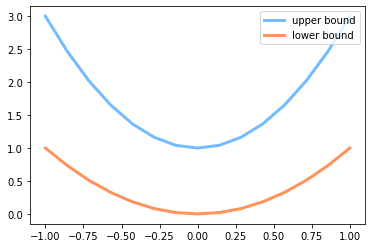

In [5]:
# show the painting range
plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')
plt.show()

In [6]:
 # painting from the famous artist (real target)
def artist_works():
    a = np.random.uniform(1, 2, size=args['batch_size'])[:, np.newaxis]
    paintings = a * np.power(PAINT_POINTS, 2) + (a - 1)
    paintings = torch.from_numpy(paintings).float()
    return paintings

In [7]:
G = nn.Sequential(
    nn.Linear(args['num_ideas'], 128),
    nn.ReLU(),
    nn.Linear(128, args['art_components']),
)

D = nn.Sequential(
    nn.Linear(args['art_components'], 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)

In [8]:
opt_G = torch.optim.Adam(G.parameters(), lr=args['lr_G'])
opt_D = torch.optim.Adam(D.parameters(), lr=args['lr_D'])

In [9]:
plt.ion()

0


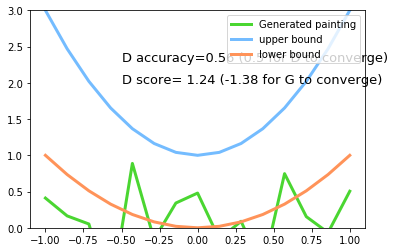

50


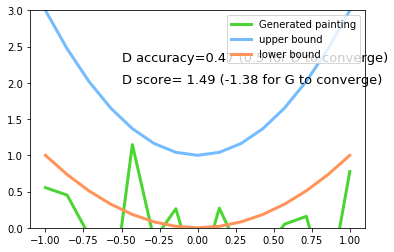

100


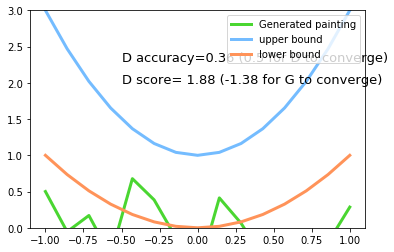

150


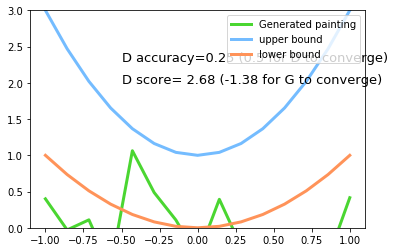

200


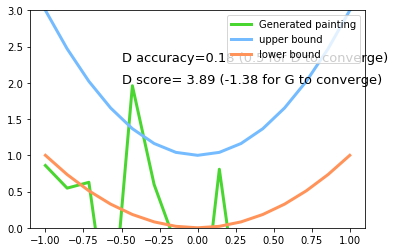

250


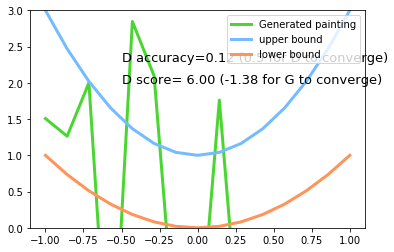

300


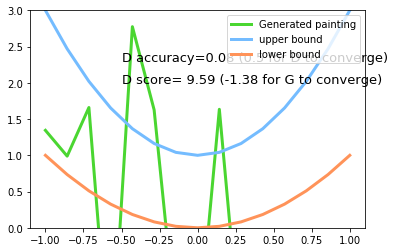

350


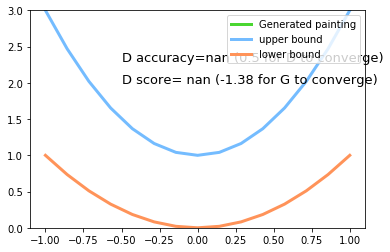

400


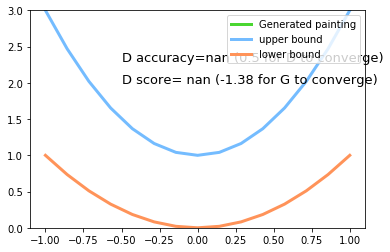

450


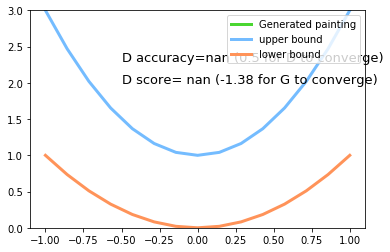

500


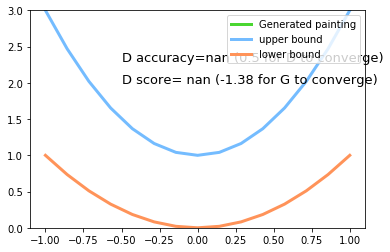

550


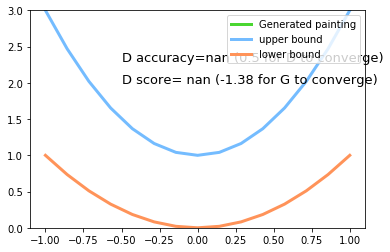

600


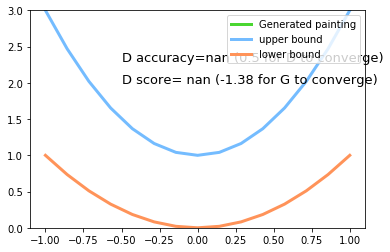

650


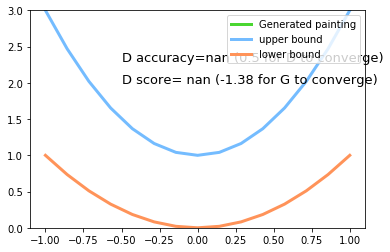

700


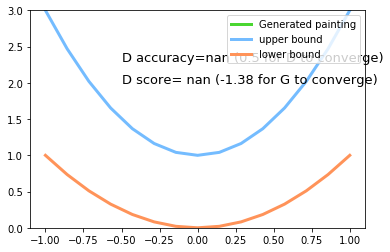

750


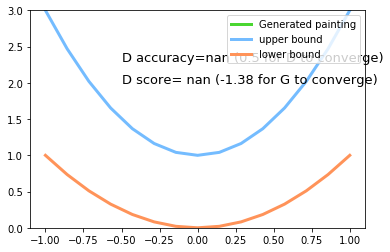

800


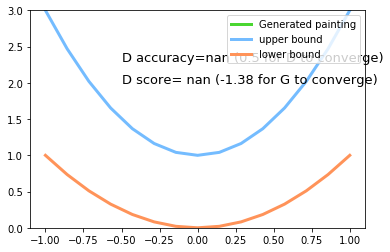

850


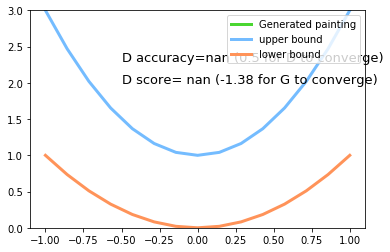

900


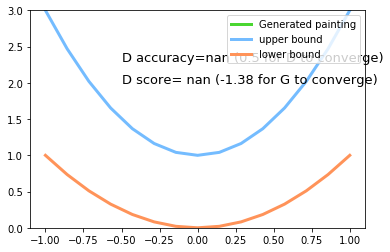

950


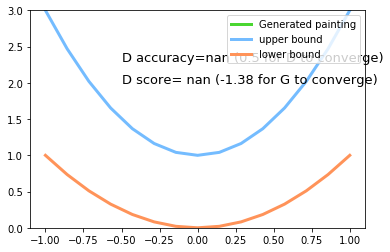

1000


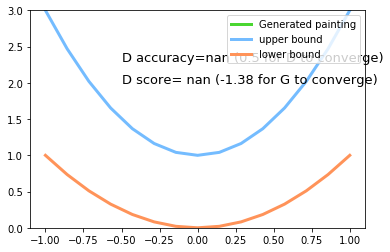

In [10]:
# train
for step in range(1001):
    artist_paintintgs = artist_works()                                                    # real painting from artist
    G_ideas = torch.randn(args['batch_size'], args['num_ideas'])  # random ideas
    G_paintings = G(G_ideas)                                                                 # fake painting from G (random ideas)
    
    prob_artist0 = D(artist_paintintgs)        # to increase
    prob_artist1 = D(G_paintings)                # to reduce
    
    D_loss = torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)   # reusing computational graph
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    if step % 50 == 0:
        print(step)
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3))
        plt.legend(loc='upper right', fontsize=10)
        plt.draw()
        plt.pause(0.01)

plt.ioff()
plt.show()